# Auswertung der Ergebnisse der Skintone-Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('faces_list_cleaned.pkl', 'rb') as f:
    loaded_list = pickle.load(f)

In [3]:
def plot_lightness_with_country(faces):
    lightness_values = []

    for face_info in faces:
        average_skin_color_rgb = face_info['average_color']
        average_skin_color_gray = np.mean(average_skin_color_rgb)
        lightness_values.append((average_skin_color_gray, face_info['country'], average_skin_color_rgb))

    lightness_values.sort(reverse=True)

    df = pd.DataFrame(lightness_values, columns=['Country', 'Lightness', 'ColorRGB']) # dataframe
    df['ColorRGB_normalized'] = df['ColorRGB'].apply(lambda x: np.array(x) / 255.0)

    plt.figure(figsize=(10, 6))  # Fixed figure size

    # plots circles with reduced marker size
    scatter = plt.scatter(df['Lightness'], df['Country'], c=df['ColorRGB_normalized'].tolist(), s=200, edgecolors='k', marker='o', zorder=2)

    plt.title("Lightness Scale per Country", fontsize=16)
    plt.xlabel("Country", fontsize=14)
    plt.ylabel("Lightness (light to dark)", fontsize=14)
    plt.grid(axis='x')
    plt.xticks(fontsize=10, rotation=45)
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


In [4]:
def box_plot_lightness_by_country(faces, show_outliers=True):
    lightness_values = []

    for face_info in faces:
        average_skin_color_rgb = face_info['average_color']
        average_skin_color_gray = np.mean(average_skin_color_rgb)
        lightness_values.append((average_skin_color_gray, face_info['country'], face_info))

    df = pd.DataFrame(lightness_values, columns=['Lightness', 'Country', 'FaceInfo'])

    plt.figure(figsize=(12, 8))
    boxplot = sns.boxplot(x='Country', y='Lightness', data=df, palette="Set3", showfliers=show_outliers)
    plt.suptitle("Box Plot of Lightness by Country", fontsize=16)
    plt.title('')
    plt.xlabel("Country", fontsize=10)
    plt.ylabel("Lightness (light to dark)", fontsize=10)
    plt.xticks(fontsize=8, rotation=45) 

    plt.show()

In [5]:
def plot_lightness_with_year(faces, plot_height):
    lightness_values = []

    for face_info in faces:
        average_skin_color_rgb = face_info['average_color']
        average_skin_color_gray = np.mean(average_skin_color_rgb)
        lightness_values.append((average_skin_color_gray, face_info['year'], average_skin_color_rgb))

    lightness_values.sort(reverse=True)

    df = pd.DataFrame(lightness_values, columns=['Lightness', 'Year', 'ColorRGB'])  
    df['ColorRGB_normalized'] = df['ColorRGB'].apply(lambda x: np.array(x) / 255.0)

    plt.figure(figsize=(15, len(df) * plot_height)) # adjust plot_height (maybe something between 0.01 and 1)

    scatter = plt.scatter(df['Year'], df['Lightness'], c=df['ColorRGB_normalized'].tolist(), s=1000, edgecolors='k', marker='o', zorder=2)

    plt.title("Lightness Scale per Year", fontsize=16)
    plt.xlabel("Year", fontsize=16)
    plt.ylabel("Lightness (light to dark)", fontsize=14)
    plt.grid(axis='x')  
    unique_years = sorted(df['Year'].unique())
    plt.xticks(unique_years)
    plt.show()

In [6]:
# plot only for one country
def plot_one_country(faces, country):    
    faces_country = []
    for face in faces:
            if face['country'] == country:
                faces_country.append(face)
    
    plot_lightness_with_year(faces_country, 0.03)

In [7]:
def plot_one_country_average(faces, country):    
    faces_country = []
    for face in faces:
            if face['country'] == country:
                faces_country.append(face)
    
    plot_lightness_with_year_and_average_line(faces_country, 0.03)

In [8]:
def plot_lightness_with_year_and_average_line(faces, plot_height, smoothing_window=3):
    lightness_values = []

    for face_info in faces:
        average_skin_color_rgb = face_info['average_color']
        average_skin_color_gray = np.mean(average_skin_color_rgb)
        lightness_values.append((average_skin_color_gray, face_info['year'], average_skin_color_rgb))

    lightness_values.sort(reverse=True)

    df = pd.DataFrame(lightness_values, columns=['Lightness', 'Year', 'ColorRGB'])  
    df['ColorRGB_normalized'] = df['ColorRGB'].apply(lambda x: np.array(x) / 255.0)

    # calculates average skin color for every year
    average_colors = df.groupby('Year')['ColorRGB_normalized'].mean()
    average_lightness = df.groupby('Year')['Lightness'].mean()

    smoothed_lightness = average_lightness.rolling(window=smoothing_window, min_periods=1).mean() # smoother line

    plt.figure(figsize=(15, len(df) * plot_height)) # adjust plot_height (maybe something between 0.01 and 1)

    scatter = plt.scatter(df['Year'], df['Lightness'], c=df['ColorRGB_normalized'].tolist(), s=1000, edgecolors='k', marker='o', zorder=2)

    # additional line
    plt.plot(average_colors.index, smoothed_lightness, color='blue', linestyle='-', linewidth=5, alpha=0.8, zorder=3)

    plt.title("Lightness Scale with Average Skin Color", fontsize=16)
    plt.xlabel("Year", fontsize=16)
    plt.ylabel("Lightness (dark to light)", fontsize=14)
    plt.grid(axis='x')  
    unique_years = sorted(df['Year'].unique())
    plt.xticks(unique_years)
    plt.show()

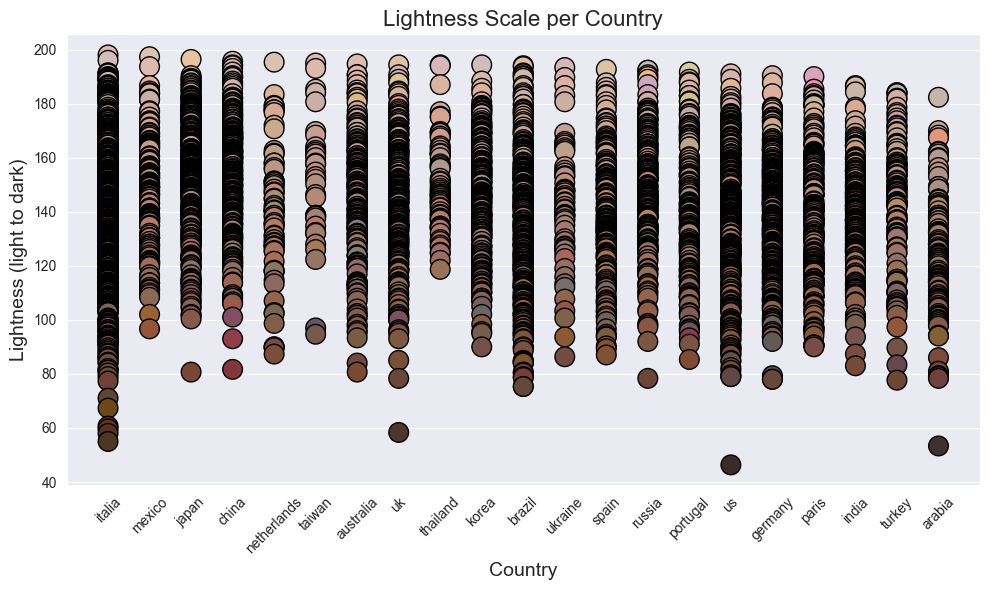

In [9]:
plot_lightness_with_country(loaded_list)

C:\Users\susan\AppData\Local\Temp\ipykernel_22228\3223709499.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='Country', y='Lightness', data=df, palette="Set3", showfliers=show_outliers)


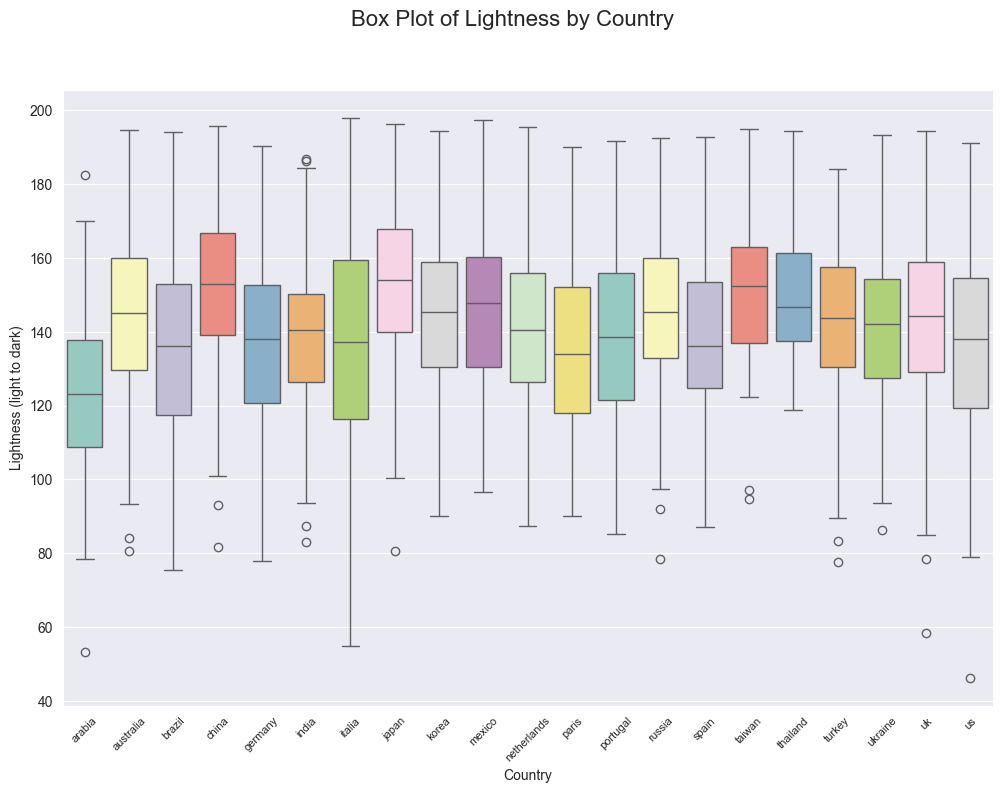

In [10]:
box_plot_lightness_by_country(loaded_list)

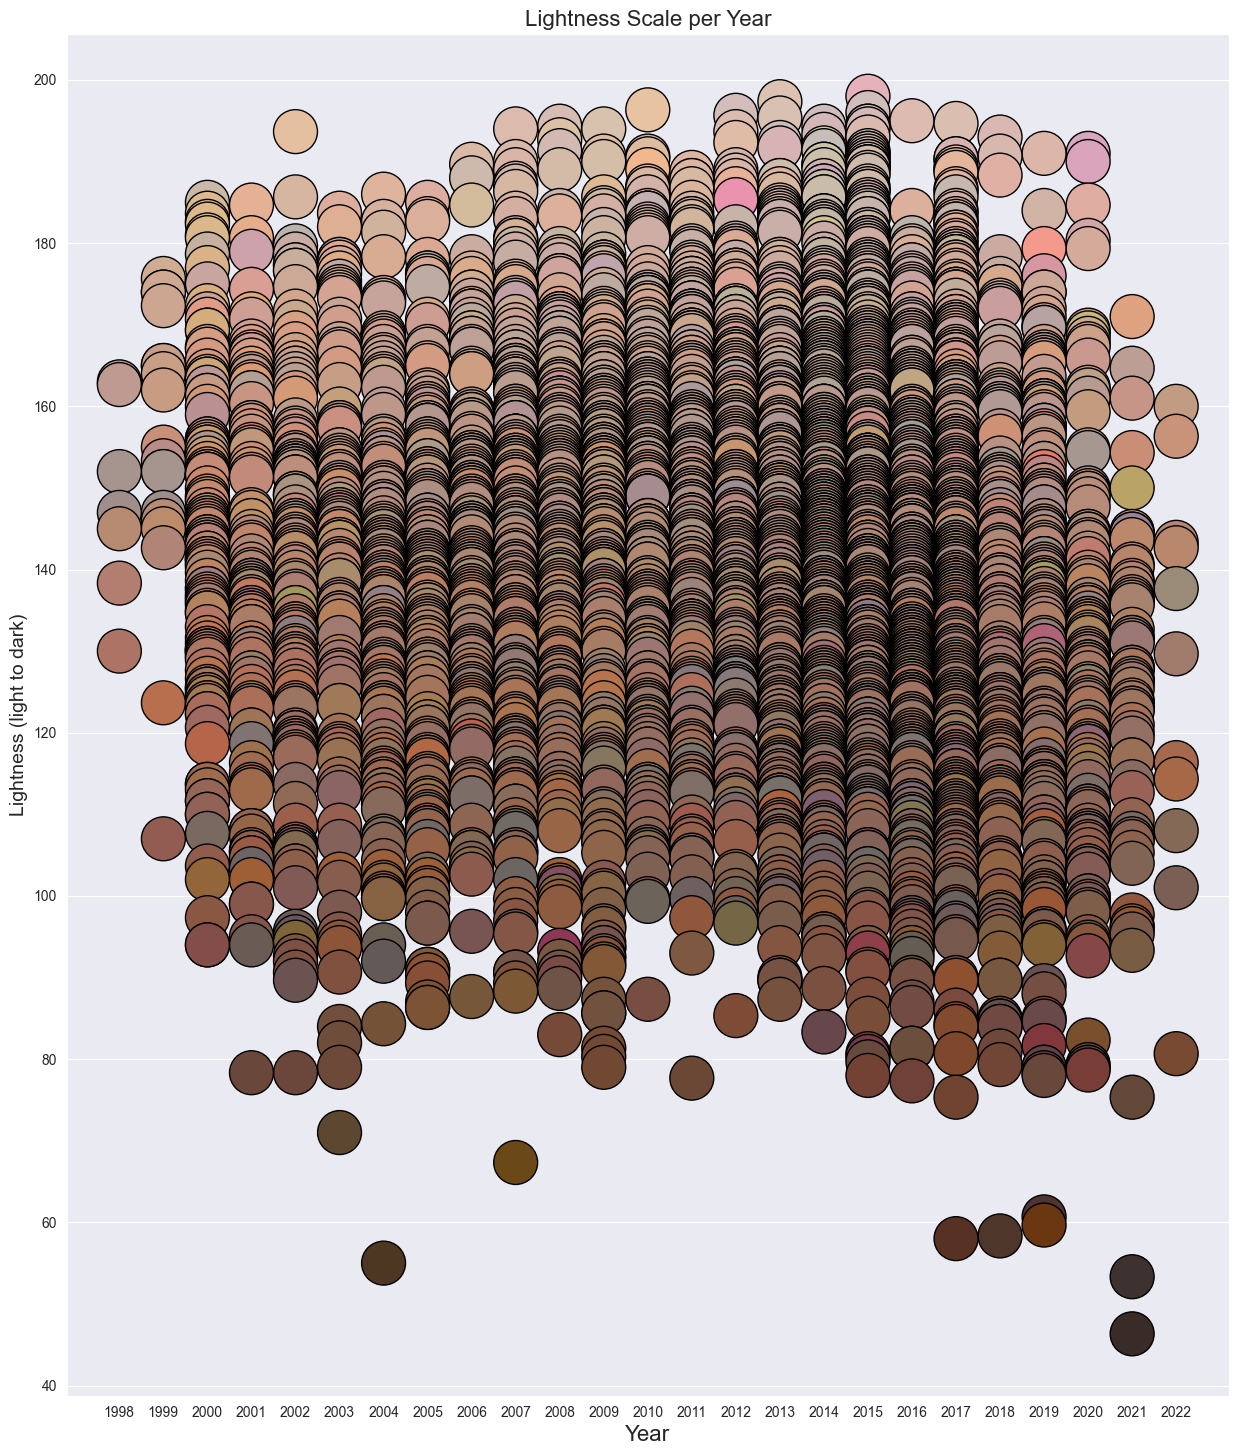

In [11]:
plot_lightness_with_year(loaded_list, 0.004)

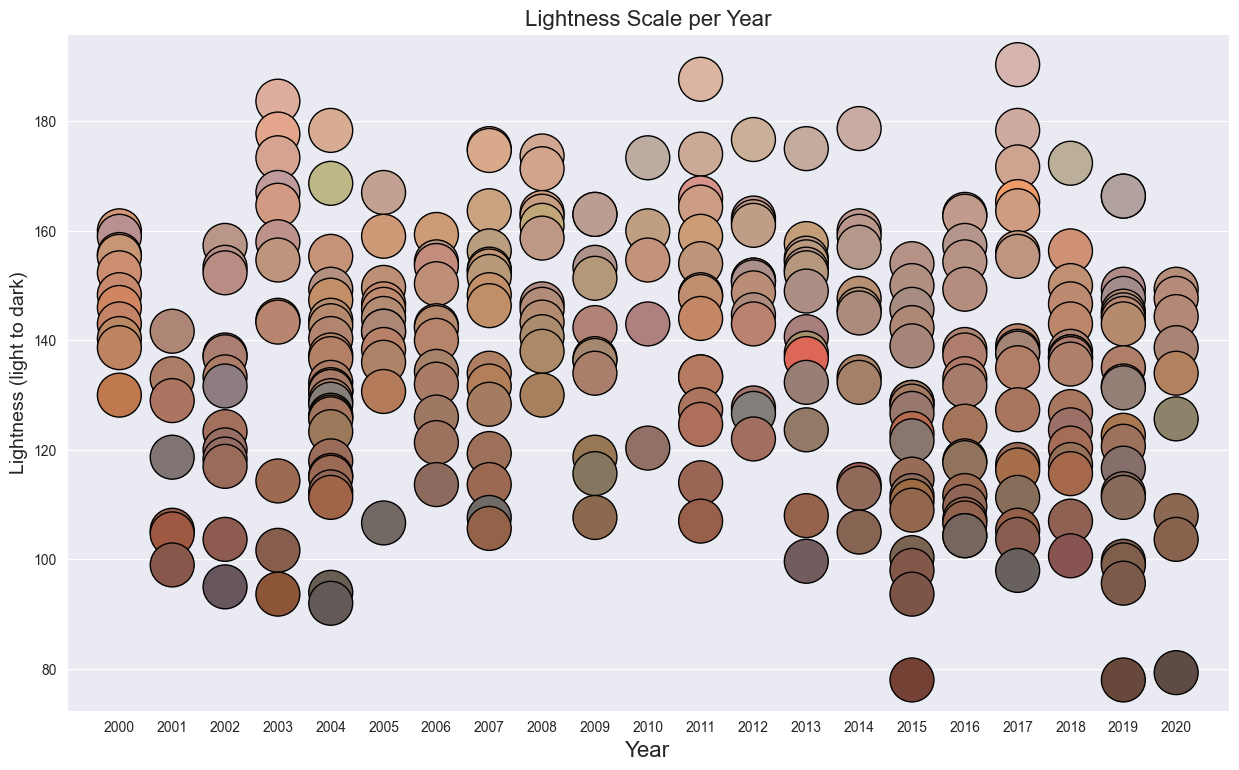

In [12]:
plot_one_country(loaded_list, 'germany')

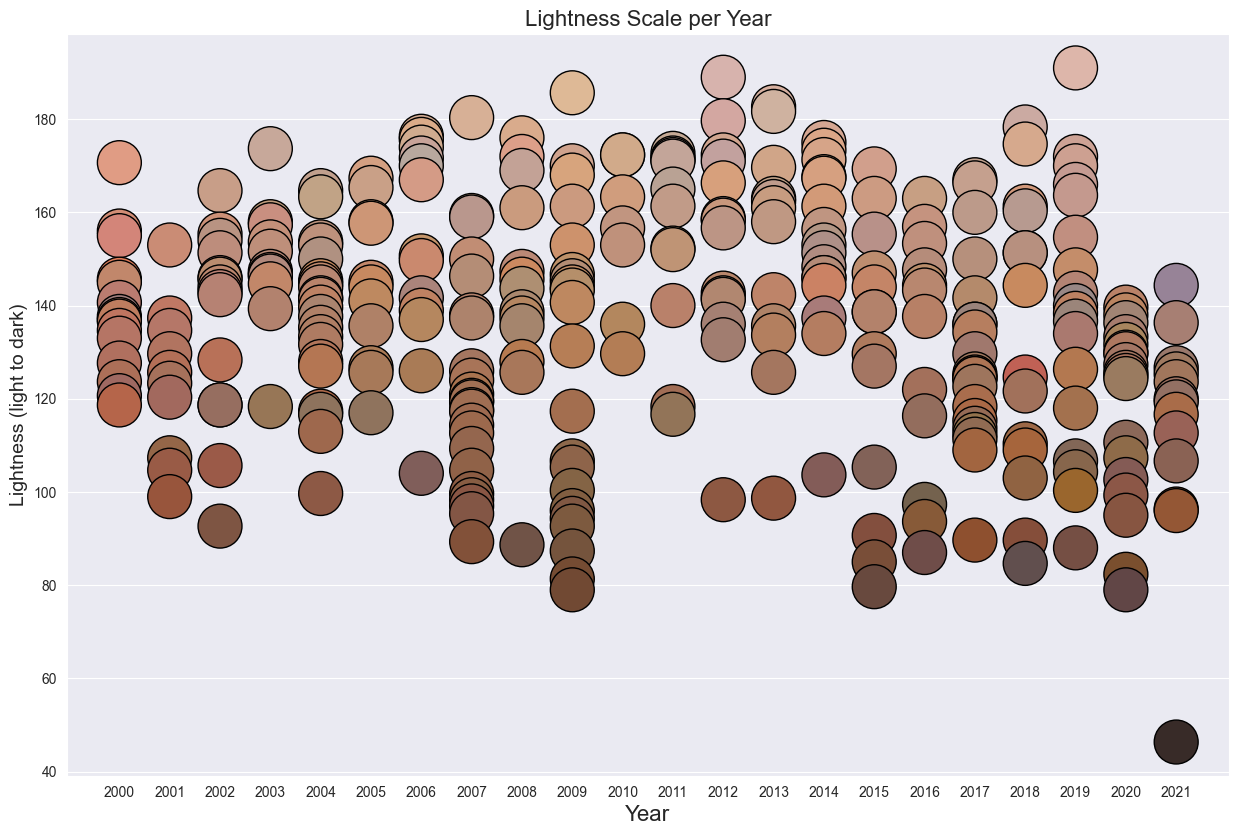

In [13]:
plot_one_country(loaded_list, 'us')

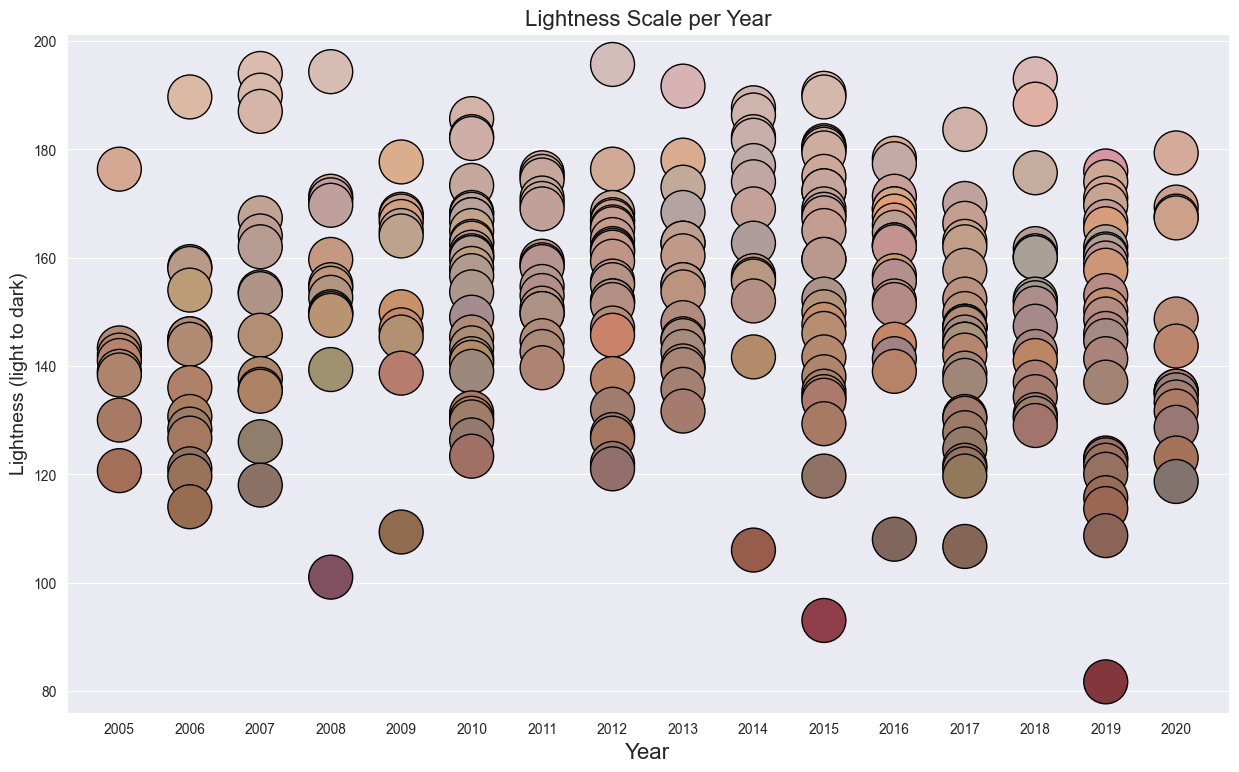

In [14]:
plot_one_country(loaded_list, 'china')

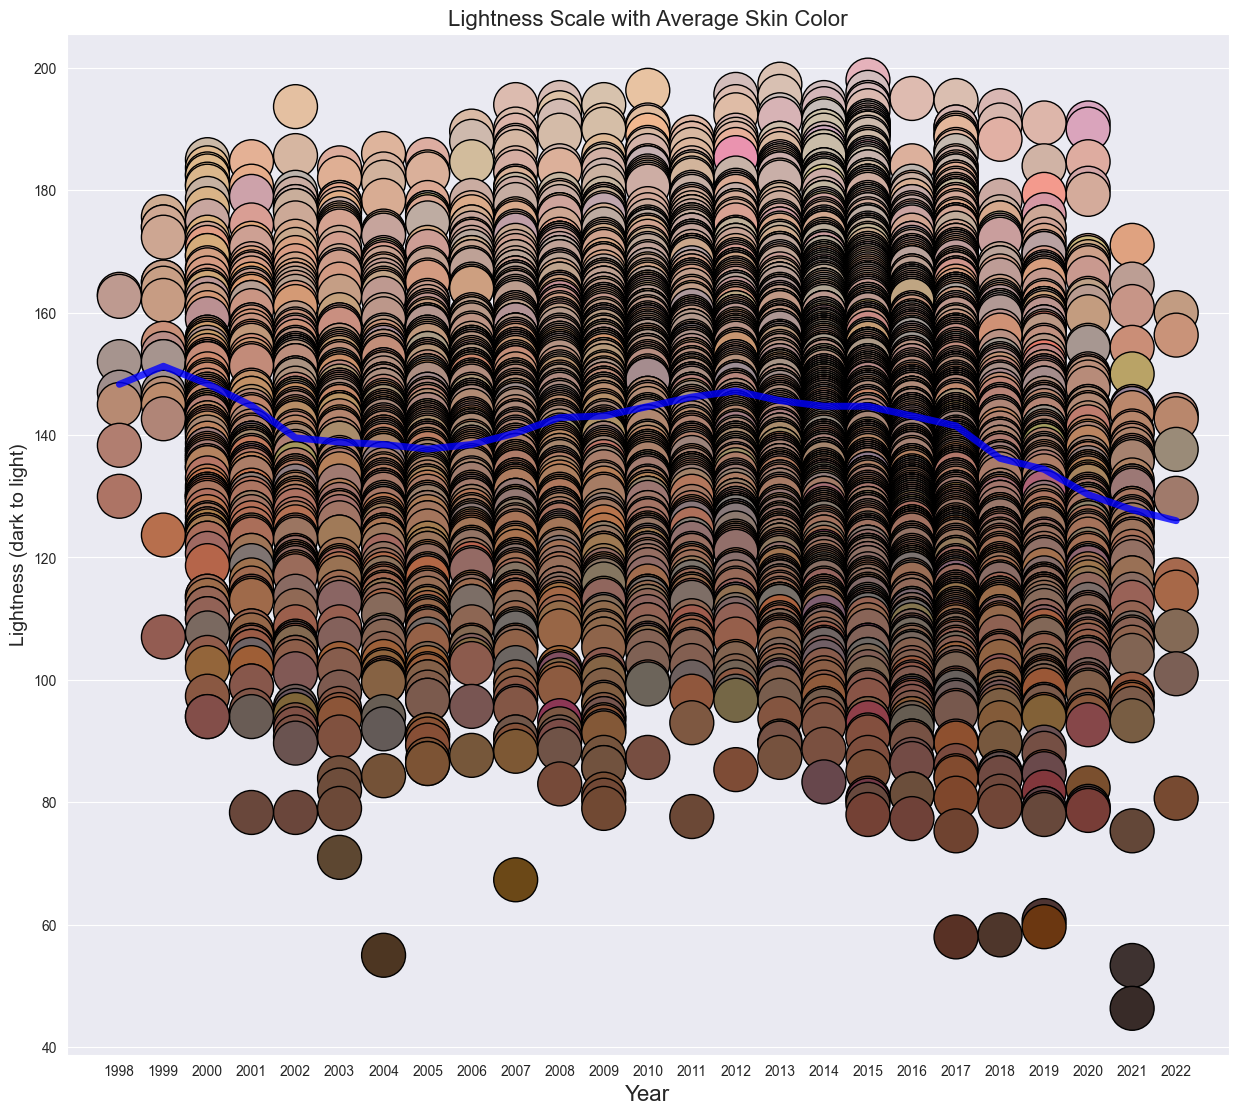

In [15]:
plot_lightness_with_year_and_average_line(loaded_list, 0.003)

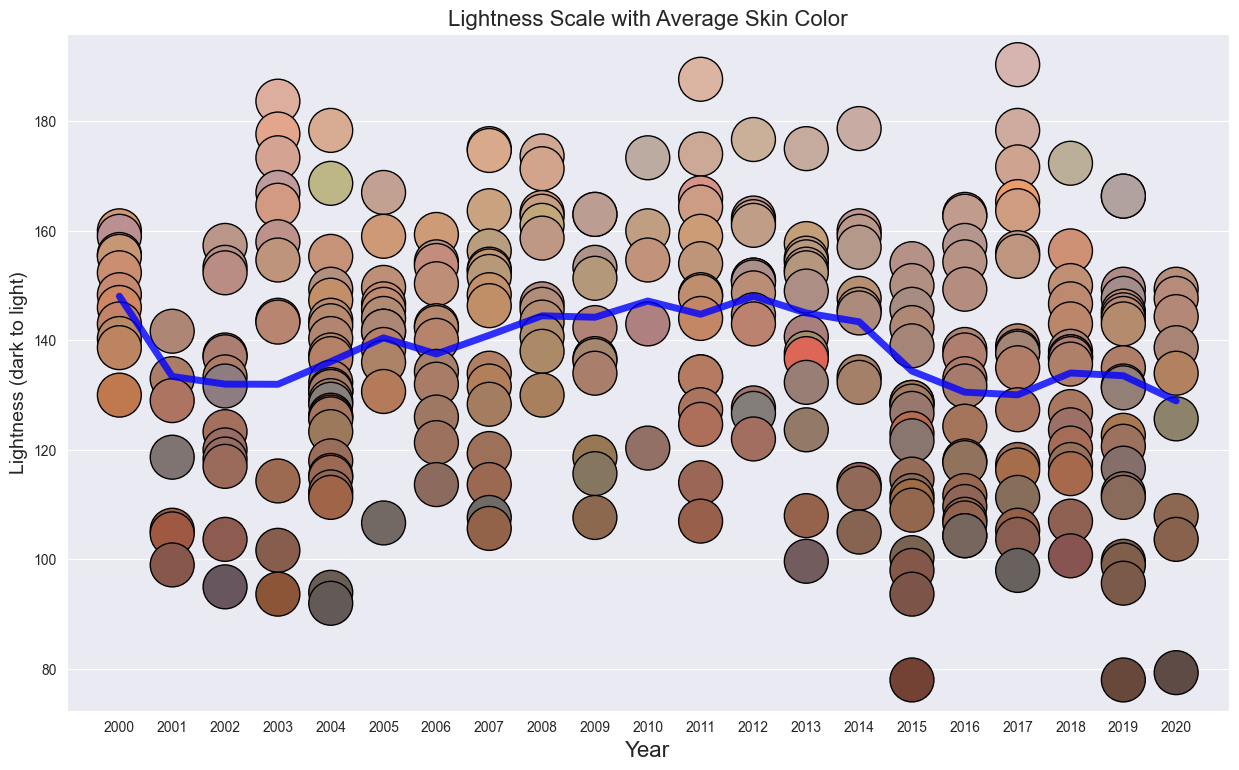

In [16]:
plot_one_country_average(loaded_list, 'germany')

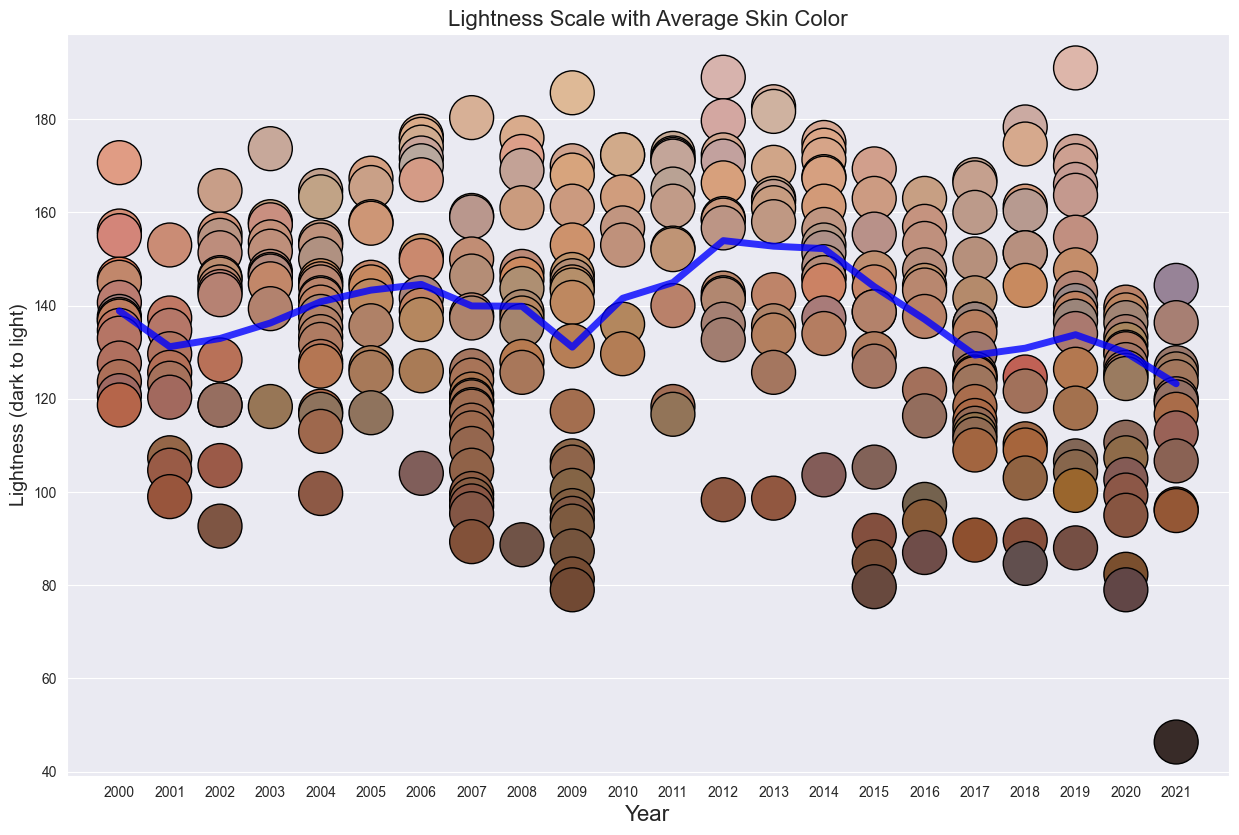

In [17]:
plot_one_country_average(loaded_list, 'us')

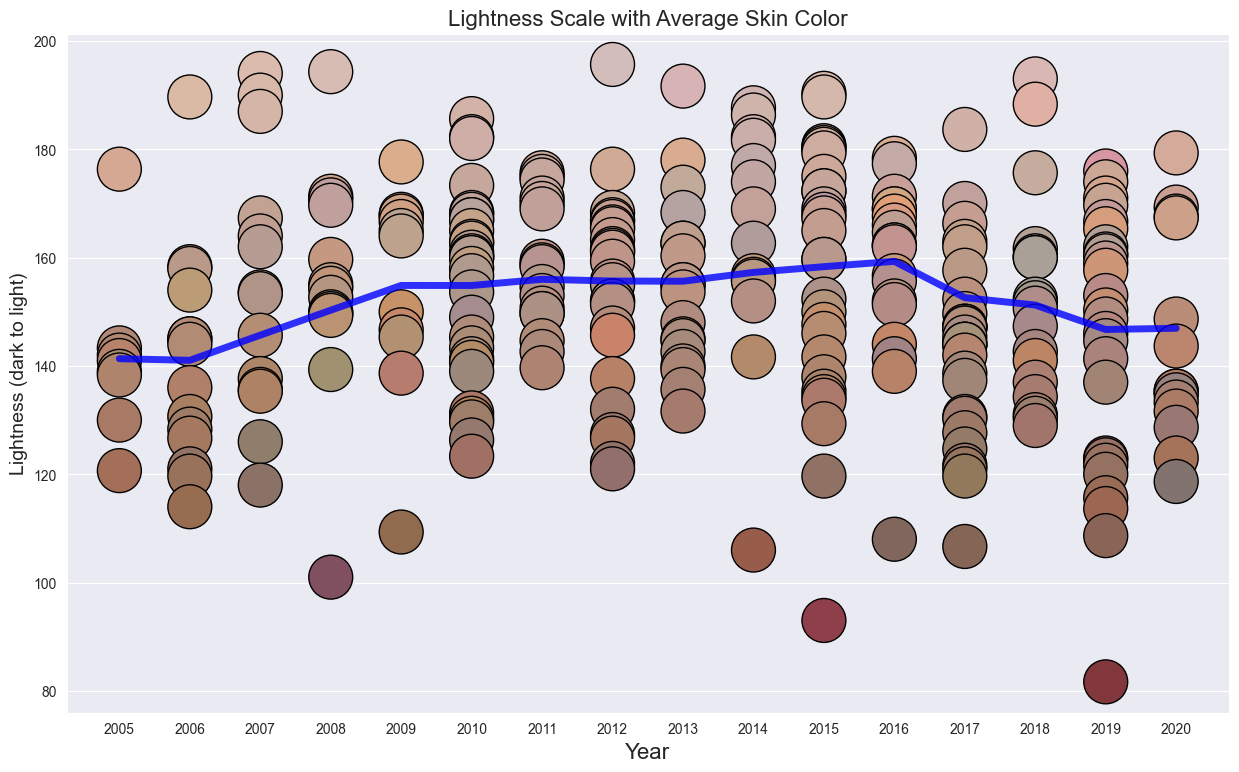

In [18]:
plot_one_country_average(loaded_list, 'china')